<a href="https://colab.research.google.com/github/byronacunia/CovidDataset/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/byronacunia/Feature_Selection.git

Cloning into 'Feature_Selection'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [6]:
X = pd.read_csv("./Feature_Selection/X_DF.csv")

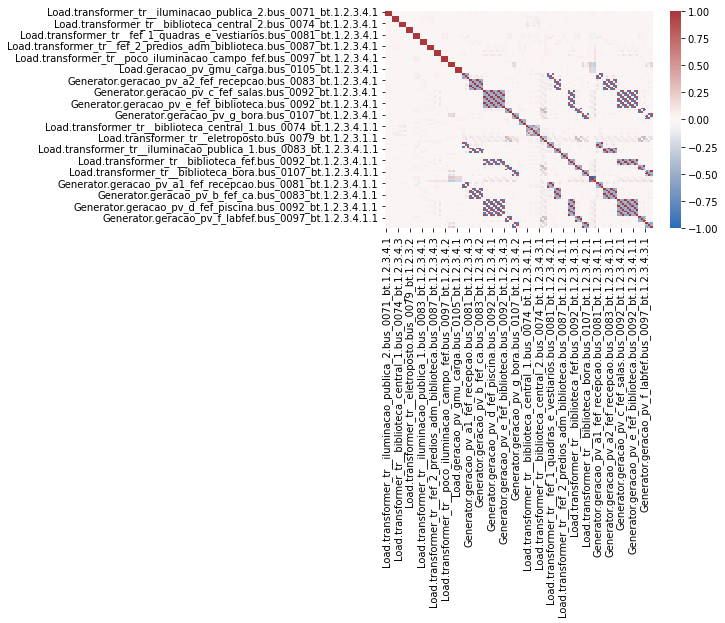

In [8]:
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1, cmap='vlag')

In [10]:
fig = heatmap.get_figure()
fig.savefig("out.pdf") 

In [18]:
pca_model = PCA(n_components=6, random_state=42).fit(X)

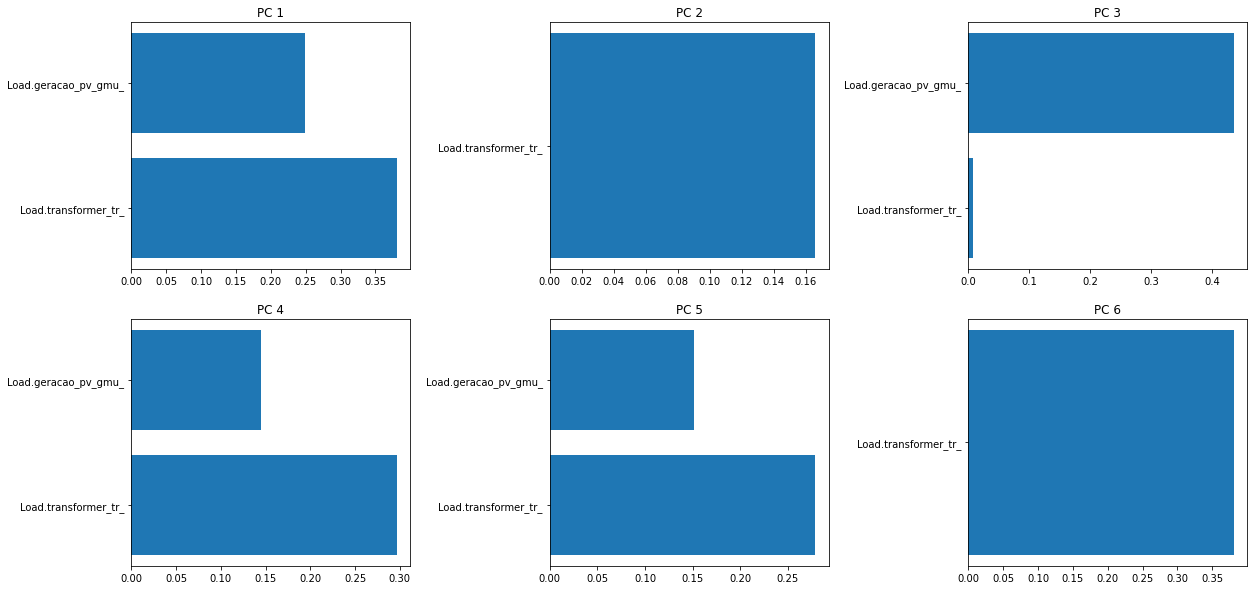

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
fig.patch.set_facecolor((1,1,1))
plt.subplots_adjust(wspace=0.5) 
pc=-1
for i in list(range(2)): #plot lines
    for j in list(range(3)): #plot cols
        pc+=1
        component_feature_explanation = pd.Series(pca_model.components_[pc], index=list(X.columns)).sort_values()
        axis_truncated = [txt[:20] for txt in component_feature_explanation[-20:].index]
        axs[i, j].barh(axis_truncated, component_feature_explanation[-20:])
        axs[i, j].set_title('PC '+str(pc+1))

In [20]:
fig.savefig("Clust.pdf")